In [4]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image

In [5]:
attr_data_path = "list_attr_celeba.csv"
images_data_path = "C:/Users/foreh/Documents/celeba/greyscale"
images_data_size = 20000 

width = 178
height = 218
x_ = 100                           # new value of x
image_size_ratio = width / height    # dimensions ratio
y_ = int(image_size_ratio * x_)  

original_image_size = (x_,y_)

In [6]:
df_org = pd.read_csv(attr_data_path)
df = df_org[:images_data_size]
df = df.replace(-1,0)

In [7]:
images_data = list()
for idx in range(df.shape[0]):
    path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image_id))
    image = PIL.Image.open(path).resize(original_image_size)
    image_array = np.asarray(image)
    images_data.append(image_array)
images_data = np.array(images_data)

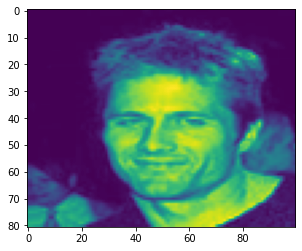

In [8]:
plt.imshow(images_data[3000])
def image_from_index(index, size=(original_image_size), path=images_data_path):
    path = "{}/{}".format(str(path),str(df.iloc[index].image_id))
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)
    
    return image_array

In [9]:
# fuction to get a list of all key points of the face
def image_attr_list(index, df=df):
    # box dictionary
    attr_list = [df.iloc[index].Straight_Hair,
                   df.iloc[index].Wavy_Hair,
                   df.iloc[index].Bangs,
                   df.iloc[index].Wearing_Hat]
    
    return attr_list

[0, 0, 0, 0]


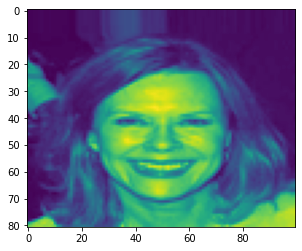

In [10]:
print(image_attr_list(300))
plt.imshow(images_data[300])

In [11]:
images = images_data # list of array of images
labels = df[["image_id", "Bangs", "Straight_Hair", "Wavy_Hair", "Wearing_Hat"]]  # dataframe of image features
print(labels)

         image_id  Bangs  Straight_Hair  Wavy_Hair  Wearing_Hat
0      000001.jpg      0              1          0            0
1      000002.jpg      0              0          0            0
2      000003.jpg      0              0          1            0
3      000004.jpg      0              1          0            0
4      000005.jpg      0              0          0            0
...           ...    ...            ...        ...          ...
19995  019996.jpg      0              0          1            0
19996  019997.jpg      0              0          0            0
19997  019998.jpg      0              0          1            0
19998  019999.jpg      0              0          1            0
19999  020000.jpg      0              0          0            0

[20000 rows x 5 columns]


In [12]:
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.3,random_state=45)
print(train_labels)

         image_id  Bangs  Straight_Hair  Wavy_Hair  Wearing_Hat
4126   004127.jpg      0              0          0            0
13120  013121.jpg      0              0          0            0
14281  014282.jpg      0              0          0            0
13157  013158.jpg      0              1          0            0
3261   003262.jpg      0              0          0            0
...           ...    ...            ...        ...          ...
16547  016548.jpg      0              0          1            0
16317  016318.jpg      1              0          0            0
12895  012896.jpg      0              0          1            0
6012   006013.jpg      0              1          0            0
6558   006559.jpg      0              1          0            0

[14000 rows x 5 columns]


In [13]:
y_test=test_labels.drop(["image_id"],axis=1)
y_train=train_labels.drop(["image_id"],axis=1)

X_test=test_images
X_train=train_images
#X_train = tf.expand_dims(X_train, axis=-1)
print("Samples Training Set:",len(X_train))

Samples Training Set: 14000


Samples in Validation Data: 3000
Samples in Test Data: 3000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]]


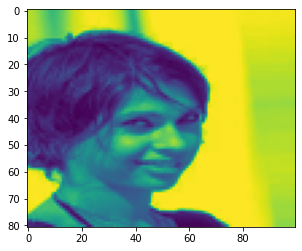

In [14]:
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test,test_size=0.5,random_state=42)
print("Samples in Validation Data:",len(X_val))
print("Samples in Test Data:",len(X_test))
print(X_val[1])
plt.imshow(X_val[2])

In [15]:
x_ = original_image_size[0]
y_ = original_image_size[1]
print(y_,x_,1)

81 100 1


In [16]:
model = Sequential()
model.add(tf.keras.Input(shape=(y_, x_,1)))
model.add(Conv2D(filters=8,kernel_size=(4,2),padding = 'same', activation = 'relu'))
## changed from (5,5)->(4,2)

model.add(Conv2D(filters=8, kernel_size=(2, 3), padding='valid', activation='relu', kernel_regularizer='l1'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(tf.keras.layers.LocallyConnected2D(filters=3,kernel_size=(2,2),padding = 'valid',activation = 'relu'))
## changed from (3,3)->(1,3)

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=8))
model.add(Flatten())
model.add(Dense(16))
model.add(Dropout(0.3))
#
model.add(Dense(4, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 81, 100, 8)        72        
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 98, 8)         392       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 49, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 49, 8)         0         
                                                                 
 locally_connected2d (Locall  (None, 39, 48, 3)        185328    
 yConnected2D)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 48, 16)        4

Empty box

In [18]:
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics = ['accuracy'])

In [19]:
checkpoint_filepath = 'C:/foreh/Documents/celeba/model_checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)

In [20]:
training_process = model.fit(X_train,y_train,epochs = 20,validation_data = (X_val,y_val),batch_size=4,shuffle = True, callbacks=[model_checkpoint_callback])

Epoch 1/20
3500/3500 [==============================] - 605s 162ms/step - loss: 0.4823 - accuracy: 0.3348 - val_loss: 0.3703 - val_accuracy: 0.3980
Epoch 2/20
3500/3500 [==============================] - 564s 161ms/step - loss: 0.3755 - accuracy: 0.4004 - val_loss: 0.3374 - val_accuracy: 0.4380
Epoch 3/20
3500/3500 [==============================] - 565s 162ms/step - loss: 0.3550 - accuracy: 0.4219 - val_loss: 0.3260 - val_accuracy: 0.4483
Epoch 4/20
3500/3500 [==============================] - 556s 159ms/step - loss: 0.3416 - accuracy: 0.4401 - val_loss: 0.3256 - val_accuracy: 0.4640
Epoch 5/20
3500/3500 [==============================] - 560s 160ms/step - loss: 0.3347 - accuracy: 0.4429 - val_loss: 0.3404 - val_accuracy: 0.4180
Epoch 6/20
3500/3500 [==============================] - 562s 161ms/step - loss: 0.3299 - accuracy: 0.4502 - val_loss: 0.3187 - val_accuracy: 0.4577
Epoch 7/20
3500/3500 [==============================] - 561s 160ms/step - loss: 0.3248 - accuracy: 0.4573 - val_

KeyboardInterrupt: 

In [22]:
model.evaluate(X_test,y_test)
model.save('./saved_models/local1-19999')

94/94 [==============================] - 9s 94ms/step - loss: 0.3273 - accuracy: 0.4697
INFO:tensorflow:Assets written to: ./saved_models/local1-19999\assets


In [30]:
model.predict(X_val)

array([[3.1338837e-02, 1.6228969e-01, 2.0403071e-01, 2.1040499e-02],
       [5.7736565e-03, 3.1562829e-01, 2.3792081e-01, 1.4619983e-04],
       [7.0528454e-01, 1.8282928e-01, 5.9561476e-02, 4.5600198e-02],
       ...,
       [2.7673173e-01, 2.7432462e-02, 6.8955854e-02, 9.9447662e-01],
       [2.5403443e-01, 2.9164708e-01, 1.6664958e-01, 1.0506367e-02],
       [4.6096858e-02, 2.2268833e-01, 6.0233527e-01, 1.7067461e-04]],
      dtype=float32)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]]


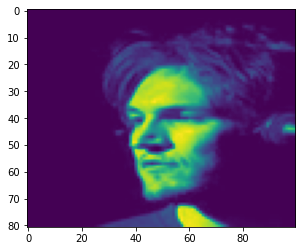

In [29]:
print(X_val[1])
plt.imshow(X_val[1])